In [216]:
!pip install opencv-python

     ---------------------------------------- 35.4/35.4 MB 4.1 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import os
import webbrowser
from PIL import Image
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt


In [48]:
pd.read_csv('opt.csv',decimal=',', sep=';')

,название,Полезность дисцпилины,Сложность дисциплины,Часы семинских занятий,Часы лекционных занятий,Часы самостоятельной работы,Количество практико-ориентированных работ,Актуальность,Количество теоретических работ
0,Информационные системы управления организацией,9,8,34,16,58,16,9,5
1,Экономика информационных систем,7,6,16,52,112,11,8,12
2,Архитектура организации,9,7,34,34,112,13,10,7
3,Управление информационно-технологическими прое...,8,9,16,34,130,12,10,10
4,Информационные технологии бизнес аналитики,8,7,16,34,22,9,9,6
5,Основы управления ИТ-сервисами,6,6,16,34,130,10,7,9
6,Основы управления информационными технологиями,7,5,34,34,112,15,8,7
7,Информационная безопасность,8,8,16,18,74,11,10,11
8,Цифровой бизнес,6,6,34,50,132,12,10,13
9,Мобильные технологии,8,9,16,18,74,8,9,8


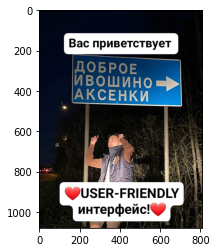

Датафрейм, полученный после сверстки введенных данны:
      0    1    2    3    4    5    6    7    8    9    10
0   9.0  7.3  5.6  3.9  2.2  0.5 -1.2 -2.9 -4.6 -6.3 -8.0
1   7.0  5.7  4.4  3.1  1.8  0.5 -0.8 -2.1 -3.4 -4.7 -6.0
2   9.0  7.4  5.8  4.2  2.6  1.0 -0.6 -2.2 -3.8 -5.4 -7.0
3   8.0  6.3  4.6  2.9  1.2 -0.5 -2.2 -3.9 -5.6 -7.3 -9.0
4   8.0  6.5  5.0  3.5  2.0  0.5 -1.0 -2.5 -4.0 -5.5 -7.0
5   6.0  4.8  3.6  2.4  1.2  0.0 -1.2 -2.4 -3.6 -4.8 -6.0
6   7.0  5.8  4.6  3.4  2.2  1.0 -0.2 -1.4 -2.6 -3.8 -5.0
7   8.0  6.4  4.8  3.2  1.6  0.0 -1.6 -3.2 -4.8 -6.4 -8.0
8   6.0  4.8  3.6  2.4  1.2  0.0 -1.2 -2.4 -3.6 -4.8 -6.0
9   8.0  6.3  4.6  2.9  1.2 -0.5 -2.2 -3.9 -5.6 -7.3 -9.0
10  6.0  4.9  3.8  2.7  1.6  0.5 -0.6 -1.7 -2.8 -3.9 -5.0
11  9.0  7.4  5.8  4.2  2.6  1.0 -0.2 -1.4 -2.6 -3.8 -5.0
None
Результаты сверстки по введенным данным:
            0
0   7.304375
1   6.873750
2   7.717500
3   6.934375
4   5.958125
5   5.715625
6   7.342500
7   6.938125
8   7.867500
9   5.625625
1

In [19]:

class opt:
    '''
    Данный класс содержит следующие функции:
    for_two_criteria - функция свертки для двух основных критерий.
        в параметры задаются значения: 
            а1 (пока что), по умолчанию там значения от 1 до 0 с шагом 0.1
            criteria - номера столбцов критериев, по умолчанию там стоят первые два столбца
            max_min - 0, 1: максимизация или минимизация соответственно 
    for_all - свертка для всех критериев
        в параметры задаются значения:
            relevance - значения для каждого критерия
        '''
    img = plt.imread('opt.jpg')
    plt.imshow(img)
    plt.show()

    def __init__(self, data):
        self.data = pd.read_csv(data, decimal=',', sep=';')


    def for_two_criteria(self, a1=[i/10 for i in range(10, -1, -1)], criteria = [1,2], max_min = 0):
        a2 = [1 - i for i in a1]
        df = self.data.copy()
        names = df.iloc[:,0].tolist()
        criteria_names = df.columns.tolist()
        a,b=df.shape[0],df.shape[1]
        x1 = df.iloc[:,criteria[0]].tolist()
        x2 = df.iloc[:,criteria[1]].tolist()
        
        main_list = []
        count = 0
        count_a = 0
        
        for e in range(len(x1)):
            inner_list = []
            for i in range(len(a1)):
                inner_list.append(a1[i]*x1[e] - a2[i]*x2[e])
            main_list.append(inner_list)
        df1 = pd.DataFrame(main_list)
        max_df = df1.max(axis=0)    
        df1.loc[a] = max_df
        text = print('Датафрейм, полученный после сверстки введенных данны:\n', df1)
        
        return(text)
        
    def for_all(self, relevance = [8,-6,7/10,2/10,3/100,5,9,4]):
#         a1 = [i/sum(relevance) for i in relevance]
        a1 = [i/32 for i in relevance]
        df = self.data.copy()
        
        collapse_list = []
        for i in range(len(df.iloc[:,1:])):
            collapse_list.append(df.iloc[i].tolist())
            
        for i in collapse_list:
            i.pop(0)
        
        a1_index = 0
        multiply_list = []
        for i in collapse_list:
            inner_list=[]
            for en, e in enumerate(i):
                inner_list.append(e*a1[en])
            multiply_list.append(inner_list)
        
        final_list = []
        for i in multiply_list:
            final_list.append(sum(i))
        df_rel = pd.DataFrame(final_list)
        text = print('Результаты сверстки по введенным данным:\n', df_rel)
        return(text)
        
        
    
o = opt('opt.csv')
print(o.for_two_criteria())
print(o.for_all())